<a href="https://colab.research.google.com/github/viriditass/Awesome-Korean-NLP-Papers/blob/master/Markov_chain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Markov chain**

## **1. What is Markov chanin?**

마크코프 체인의 정의란 마크코프 성질을 가진 이산 확률과정을 뜻한다.

**마크로프 성질**은 **'과거와 현재 상태가 주어졌을 때의 미래 상태의 조건부 확률 분포가 과거가 아닌 오직 현재 상태에 의해서만 결정된다'**라는 것을 뜻한다.

## **2. Example**

이해를 돕기 위해 예시를 들겠다.

아래의 조건을 따르는 신기한 레스토랑이 있다.
- 치킨, 피자, 햄버거 중 하루에 단 1개만 요리를 해서 서빙한다.
- 어제 무엇을 먹었는지에 따라 그 다음날에 무엇을 서빙할지 예측하는 방법이 있다.
- 위에서 말한 예측 방법은 아래의 이미지에 해당한다.

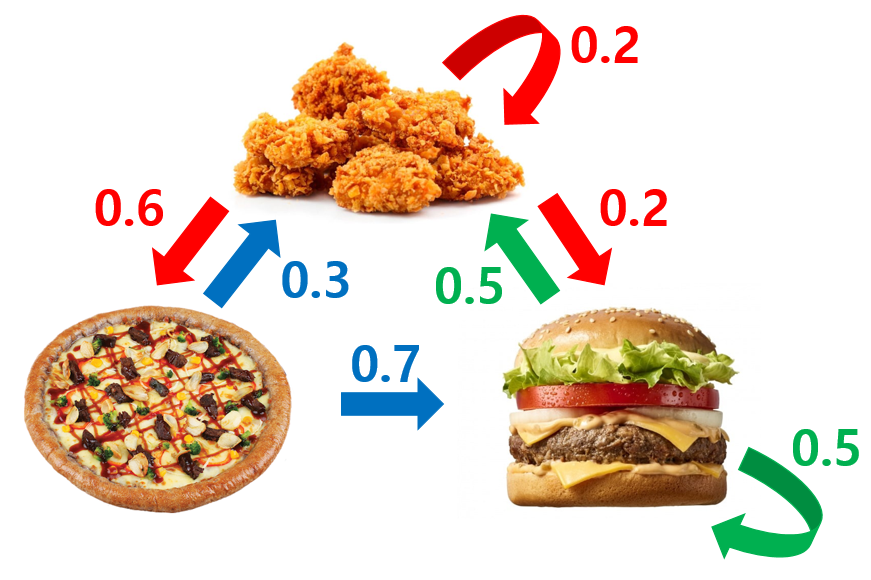

위의 그림에 나온 전이 확률을 다시 적어보자면,
- 치킨 => 치킨로 전이할 확률은 0.2
- 치킨 => 피자로 전이할 확률은 0.6
- 치킨 => 햄버거로 전이할 확률은 0.2
- 피자 => 치킨로 전이할 확률은 0.3
- 피자 => 피자로 전이할 확률은 0.0
- 피자 => 햄버거로 전이할 확률은 0.7
- 햄버거 => 치킨로 전이할 확률은 0.5
- 햄버거 => 피자로 전이할 확률은 0
- 햄버거 => 햄버거로 전이할 확률은 0.5

만일 [1일: 피자], [2일: 치킨], [3일: 피자]

일때, [4일: 햄버거]일 확률은 얼마나 될까?

바로 0.7이다.

그 이유는 바로 마로코프 체인은 위에서 말했다 싶이 미래의 일은 과거가 아닌 오직 현재만 영향을 끼치기 때문에, 피자에서 햄버거로 전이할 확률인 0.7이 된다.

이를 수식으로 나타내면

- P(X(n+1)=x | X1 = x1, X2 = x2, X3 = x3... X(n) = x(n)) = P(X(n+1)=x | X(n) = x(n))

이다.


### **Random walk**

10개를 무작위로 뽑아,

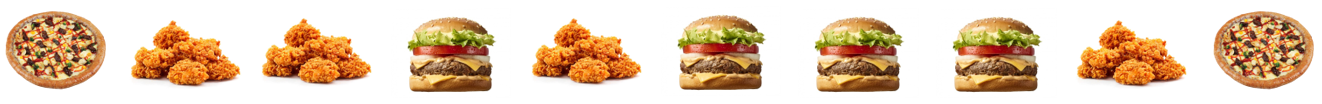


위의 이미지와 같이 나왔을 경우, 이 경우 [치킨=0.4], [피자=0.2], [햄버거=0.4]의 확률을 가진다고 생각을 할 수 있다.

하지만, 만일 10개가 아닌 1000개, 1000000개 이런식으로 무작위로 뽑았을 경우에도 이렇게 일일이 세야할까??

이럴때 바로 마르코프 체인을 사용하게 된다. 자세한 내용은 아래의 코드를 참조하면 된다.

이렇게 많은 횟수를 반복하다보면 어느 순간에는 전이행렬이 변하지 않는 상태가 오는데 이를 두고 **안정상태(steady state)**라고 부르고, 확률이 직전 상태와 동일하게 수렴하게 된다. 또한, 이러한 확률 분포를 **정적 분포(Stationary Distribution)**라고 부른다.

### **Python**

In [14]:
import random
import numpy as np

In [19]:
today_food = ['Chicken', 'Pizza', 'Hamburger']

transition_initial = [['CC', 'CP', 'CH'], ["PC", 'PP', 'PH'], ['HC', 'HP', 'HH']]

transition_matrix = [[0.2, 0.6, 0.2], [0.3, 0, 0.7], [0.5, 0, 0.5]]

In [18]:
if sum(transition_matrix[0]) != 1:
  print("Something is wrong in first matrix")

if sum(transition_matrix[1]) != 1:
  print("Something is wrong in second matrix")

if sum(transition_matrix[2]) != 1:
  print("Something is wrong in third matrix")

In [ ]:
def serving_food(days, today_food):
  food_list = [today_food]
  i = 0
  prob = 1
  while i != days:
    if today_food == 'Chicken':
      change = np.random.choice(transition_initial[0], replace=True, p=transition_matrix[0])
      if change == 'CC':
        prob = prob * 0.2
        food_list.append('Chicken')
      elif change == 'CP':
        prob = prob * 0.6
        food_list.append('Pizza')
      elif change == 'CH':
        prob = prob * 0.2
        food_list.append('Hamburger')
    
    elif today_food == 'Pizza':
      change = np.random.choice(transition_initial[1], replace=True, p=transition_matrix[1])
      if change == 'PC':
        prob = prob * 0.3
        food_list.append('Chicken')
      # Pizza => Pizza = 0.0
      elif change =='PH':
        prob = prob * 0.7
        food_list.append('Hamburger')
    
    elif today_food == 'Hamburger':
      change = np.random.choice(transition_initial[2], replace=True, p=transition_matrix[2])
      if change == 'HC':
        prob = prob * 0.5
        food_list.append('Chicken')
      # Hamburger => Pizza = 0.0
      elif change =='HH':
        prob = prob * 0.5
        food_list.append('Hamburger')
    
    i += 1
  return food_list

list_food = []
count = 0

for i in range(1, 100):
  list_food.append(serving_food('Pizza', 2))

for j in list_food:
  if j[2] == 'Pizza':
    count += 1

percentage = (count/100)
print("The probability of starting at state:'Pizza' and ending at state:'Pizza'= " + str(percentage) + "%")


"""food_list = serving_food(1000, 'Pizza')
print(food_list)

Chicken_count = 0
Pizza_count = 0
Hamburger_count = 0

for i in range(0, 1000):
  if food_list[i] == 'Chicken':
    Chicken_count += 1
  elif food_list[i] == 'Pizza':
    Pizza_count += 1
  elif food_list[i] == 'Hamburger':
    Hamburger_count += 1

Chicken_percent = Chicken_count/1000
Pizza_percent = Pizza_count/1000
Hamburger_percent = Hamburger_count/1000

print("Chicken: %f | Pizza: %f | Hamburger: %f" % (Chicken_percent, Pizza_percent, Hamburger_percent))"""

In [40]:
import numpy as np

p = np.array([0.2, 0.6, 0.2, 0.3, 0, 0.7, 0.5, 0, 0.5]).reshape(3,3)

a = np.array([0, 1, 0])

for i in range(0, 1000):
  a = np.dot(a, p)

print(a)

[0.35211268 0.21126761 0.43661972]


즉, 최종적으로 이 레스토랑은 약 0.35 확률로 치킨을 제공하고 약 0.21 확률로 피자를 제공하고 약 0.44 확률로 햄버거를 제공하게 된다.

이 기술을 사용하면 실제로 하나 이상의 고정된 상태를 어떻게 확인하는지 알 수 있다.